<a href="https://colab.research.google.com/github/Imdad990/MNIST_Autoencoder_KNN/blob/main/MNIST_Autoencoder%2BKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model


In [ ]:
# MNIST dataset load karo
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize (0-1 range mein convert karo)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Noise add karna
noise_factor = 0.5  # Kitna noise add karna hai
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values (0-1 range mein rakhna)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)


In [ ]:
# Encoder
input_layer = Input(shape=(28, 28))  # MNIST image size
x = Flatten()(input_layer)  # 28x28 ko 1D bana diya
x = Dense(128, activation='relu')(x)  # Feature extraction
x = Dense(64, activation='relu')(x)  # Compressed representation

# Decoder
x = Dense(128, activation='relu')(x)
x = Dense(28*28, activation='sigmoid')(x)
output_layer = Reshape((28, 28))(x)  # Wapas 28x28 image banai

# Model Define
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')  # MSE loss best hai denoising ke liye


In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=15,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0169 - val_loss: 0.0169
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0167 - val_loss: 0.0169
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0166 - val_loss: 0.0165
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0165 - val_loss: 0.0164
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0163 - val_loss: 0.0164
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0162 - val_loss: 0.0164
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0161 - val_loss: 0.0162
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0160 - val_loss: 0.0161
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0159 - val_loss: 0.0162
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0159 - val_loss: 0.0161
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0157 - val_loss: 0.0160
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


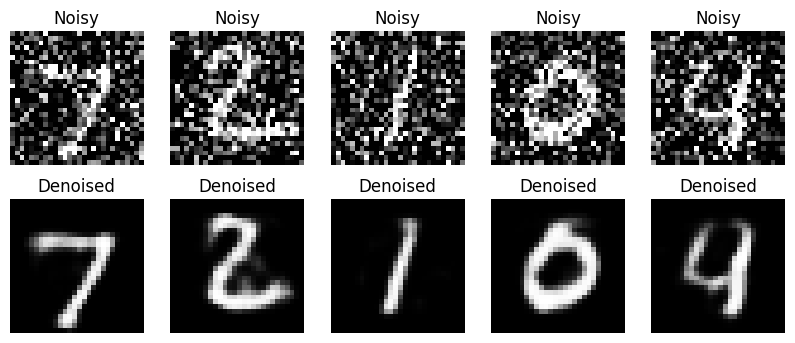

In [ ]:
# Model noisy images ko clean karega
denoised_images = autoencoder.predict(x_test_noisy)

# Display Results
n = 5  # 5 images dekhni hain
plt.figure(figsize=(10, 4))
for i in range(n):
    # Noisy Image
    plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i], cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised Image
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_images[i], cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()


# Now for prediction numbers

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical


#  MNIST Data Load Karo (Labels Ke Saath)


In [ ]:
# MNIST dataset load karo (X -> images, Y -> labels)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize (0-1 range)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten Images for Training
x_train_flatten = x_train.reshape(-1, 28*28)
x_test_flatten = x_test.reshape(-1, 28*28)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#  Autoencoder Model Train Karna (Feature Extraction Ke Liye)

In [ ]:
# Encoder
input_layer = Input(shape=(28*28,))
x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)  # Compressed representation

# Decoder
x = Dense(64, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
decoded = Dense(28*28, activation='sigmoid')(x)  # Output 0-1 range mein

# Autoencoder Model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Model
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_flatten, x_test_flatten))

# Encoder Model (Feature Extraction ke liye)
encoder = Model(input_layer, encoded)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0778 - val_loss: 0.0283
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0261 - val_loss: 0.0201
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0198 - val_loss: 0.0174
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0173 - val_loss: 0.0154
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0155 - val_loss: 0.0140
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0141 - val_loss: 0.0132
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0132 - val_loss: 0.0123
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0125 - val_loss: 0.0119
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0119 - val_loss: 0.0115
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0115 - val_loss: 0.0110


# Handwritten Digit Classifier Train Karna

In [ ]:
# Features Extract Karo Encoder se
x_train_encoded = encoder.predict(x_train_flatten)
x_test_encoded = encoder.predict(x_test_flatten)

# KNN Classifier Train Karna (Tum Neural Network bhi use kar sakte ho)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_encoded, y_train)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


KNeighborsClassifier()

#  Multiple Handwritten Digits Predict Karna

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


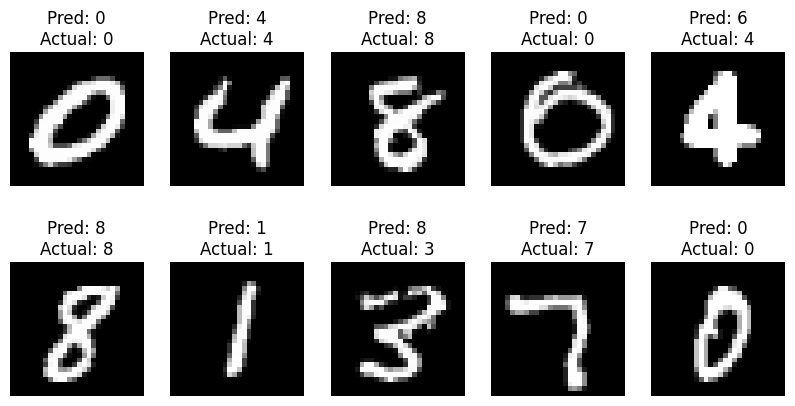

In [ ]:
# 10 Random Digits Select Karo
indices = np.random.choice(len(x_test), 10, replace=False)
test_images = x_test[indices]
test_labels = y_test[indices]

# Feature Extraction
test_encoded = encoder.predict(test_images.reshape(-1, 28*28))

# Predict Numbers
predictions = knn.predict(test_encoded)

# Display Results
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i], cmap="gray")
    plt.title(f"Pred: {predictions[i]}\nActual: {test_labels[i]}")
    plt.axis("off")
plt.show()


# Accuracy Compute Karne Ka Code


In [ ]:
from sklearn.metrics import accuracy_score

# Test dataset par predictions
y_test_pred = knn.predict(x_test_encoded)

# Accuracy Compute Karna
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 95.98%
